In [ ]:
!pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2 MB 4.4 kB/s 
     |████████████████████████████████| 454 kB 43.5 MB/s 
     |████████████████████████████████| 2.9 MB 47.7 MB/s 
     |████████████████████████████████| 3.0 MB 36.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalli

In [ ]:
import tensorflow
print(tensorflow. __version__) 

2.2.0


In [ ]:
import numpy as np  
import pandas as pd  


In [ ]:
!pip install opendatasets
import opendatasets as od 
od.download("https://www.kaggle.com/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset")

100%|██████████| 161M/161M [00:04<00:00, 41.7MB/s]


In [ ]:
import os 
print(os.listdir("/content/corn-or-maize-leaf-disease-dataset/data"))

['Gray_Leaf_Spot', 'Blight', 'Common_Rust', 'Healthy']


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
path = "/content/corn-or-maize-leaf-disease-dataset/data/"
classes = os.listdir(path)
print('classes: ', classes)

def display_images(random_number):
    for i in classes:
        new_path = path + i
        image_path = new_path + '/' + os.listdir(new_path)[random_number]
        plt.title(i)
        plt.imshow(plt.imread(image_path))
        plt.show()

classes:  ['Gray_Leaf_Spot', 'Blight', 'Common_Rust', 'Healthy']


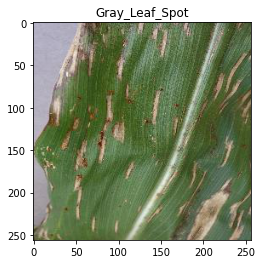

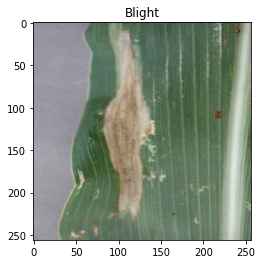

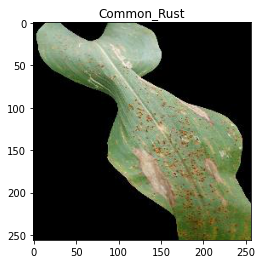

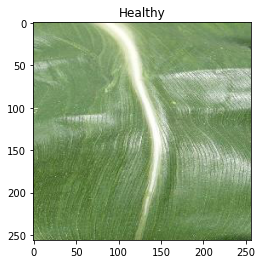

In [ ]:
display_images(100)

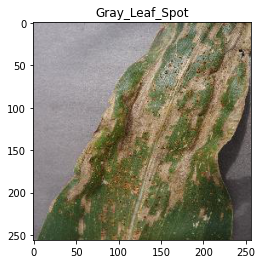

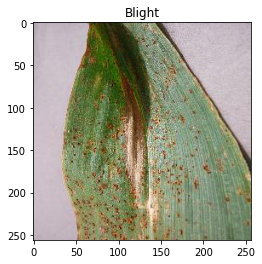

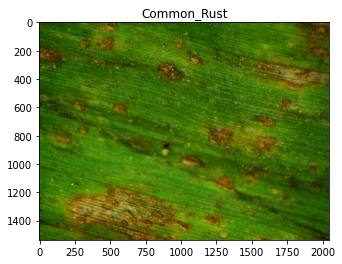

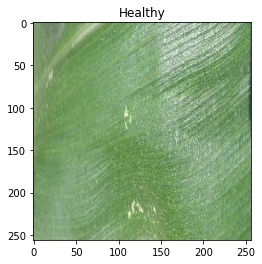

In [ ]:
display_images(10)

In [ ]:
def count_images(path, classes):
    class_count = []
    for i in classes:
        class_count.append(len(os.listdir(path + i)))
        
    df = pd.DataFrame(columns = ["Class_Name", "No of Images"])
    df['Class_Name'] = classes
    df["No of Images"] = class_count
    return df

In [ ]:
count_images(path, classes)

,Class_Name,No of Images
0,Gray_Leaf_Spot,574
1,Blight,1146
2,Common_Rust,1306
3,Healthy,1162


In [ ]:
def image_extensions(classes):
    
    
    for label in classes:
        extensions = []
        for img in os.listdir(path + label):
            extensions.append(img.split('.')[-1])
        print("class: ", label)
        print("extensions: ", list(set(extensions)))

In [ ]:
image_extensions(classes)

class:  Gray_Leaf_Spot
extensions:  ['jpg', 'JPG']
class:  Blight
extensions:  ['jpg', 'jpeg', 'JPG']
class:  Common_Rust
extensions:  ['jpg', 'JPG']
class:  Healthy
extensions:  ['jpg', 'JPG']


In [ ]:
def image_size(classes):
    
    for label in classes:
        ht, wd, depth = [], [], []
        for img in os.listdir(path + label):
            
            im = plt.imread(path + label + '/' + img)
            
            ht.append(im.shape[0])
            wd.append(im.shape[1])
            depth.append(im.shape[2])
            
        print("class: ", label)
        print("average height is {}, average width is {}, average depth is {}:".format(sum(ht)/len(ht), sum(wd)/len(wd), sum(depth)/len(depth)))

In [ ]:
image_size(classes)

class:  Gray_Leaf_Spot
average height is 291.42857142857144, average width is 309.5853658536585, average depth is 3.0034843205574915:
class:  Blight
average height is 336.75392670157066, average width is 345.3979057591623, average depth is 3.0:
class:  Common_Rust
average height is 303.9502297090352, average width is 319.26722817764164, average depth is 3.0022970903522204:
class:  Healthy
average height is 256.0, average width is 256.0, average depth is 3.0:


In [ ]:
image_size = (224, 224)

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator

In [ ]:
data_generator = ImageDataGenerator(rotation_range = 40,
                                         width_shift_range = 0.2, 
                                         height_shift_range = 0.2,
                                         rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True,
                                         fill_mode = 'nearest',
                                         validation_split = 0.25)

In [ ]:
train_dataset = data_generator.flow_from_directory(path,
                                                  target_size = (224,224),
                                                  class_mode = "categorical",
                                                  batch_size = 64,
                                                  subset = "training")

val_dataset = data_generator.flow_from_directory(path,
                                                  target_size = (224,224),
                                                  class_mode = "categorical",
                                                  batch_size = 64,
                                                  subset = "validation")

Found 3143 images belonging to 4 classes.
Found 1045 images belonging to 4 classes.


In [ ]:
def visualize_generator_data(img_count):
    
    for val in range(img_count):
        img, label = val_dataset.next()
        
        print("image shape is: ", img.shape)
        plt.imshow(img[0])
        
        print(img[20].shape)
        plt.show()

image shape is:  (64, 224, 224, 3)
(224, 224, 3)


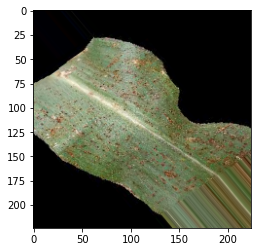

image shape is:  (64, 224, 224, 3)
(224, 224, 3)


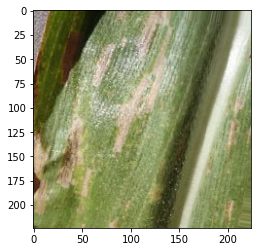

image shape is:  (64, 224, 224, 3)
(224, 224, 3)


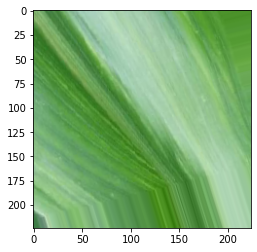

image shape is:  (64, 224, 224, 3)
(224, 224, 3)


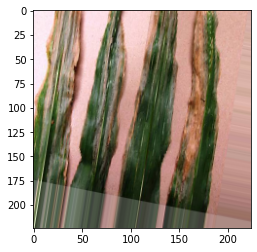

image shape is:  (64, 224, 224, 3)
(224, 224, 3)


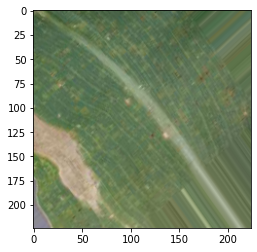

image shape is:  (64, 224, 224, 3)
(224, 224, 3)


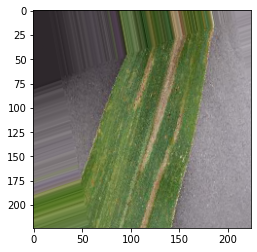

image shape is:  (64, 224, 224, 3)
(224, 224, 3)


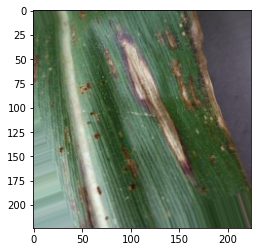

image shape is:  (64, 224, 224, 3)
(224, 224, 3)


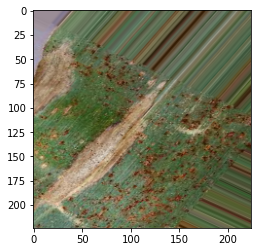

In [ ]:
visualize_generator_data(8)

In [ ]:
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam as adam_v2

In [ ]:
initial_lr = 0.0001
epochs = 10

In [ ]:
def vgg_model():
    
    vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (224, 224, 3))
    
    model = Sequential()
    model.add(vgg)
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.3))
    model.add(Dense(4, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = adam_v2(lr = initial_lr, decay = initial_lr/epochs),
                 metrics = ["accuracy"])
    
    return model

In [ ]:
vgg16_model = vgg_model()
vgg16_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1028      
Total params: 21,138,500
Trainable params: 21,138,500
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils.vis_utils import plot_model
plot_model(vgg16_model, 'vgg16.png', show_shapes = True, expand_nested=True)

ImportError: ignored

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
checkpoint=  ModelCheckpoint( 'vggmodel.h5', verbose=1, save_best_only=True)
earlystopping = EarlyStopping(patience=3)

In [ ]:
history = vgg16_model.fit(train_dataset,
                          epochs= epochs,
                          validation_data = val_dataset,
                        callbacks = [checkpoint, earlystopping],
                         verbose = True)

Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 0.7699 - accuracy: 0.6669
Epoch 00001: val_loss improved from inf to 0.42396, saving model to vggmodel.h5
50/50 [==============================] - 109s 2s/step - loss: 0.7699 - accuracy: 0.6669 - val_loss: 0.4240 - val_accuracy: 0.8182
Epoch 2/10
50/50 [==============================] - ETA: 0s - loss: 0.3834 - accuracy: 0.8365
Epoch 00002: val_loss improved from 0.42396 to 0.35153, saving model to vggmodel.h5
50/50 [==============================] - 101s 2s/step - loss: 0.3834 - accuracy: 0.8365 - val_loss: 0.3515 - val_accuracy: 0.8297
Epoch 3/10
50/50 [==============================] - ETA: 0s - loss: 0.3185 - accuracy: 0.8769
Epoch 00003: val_loss improved from 0.35153 to 0.34078, saving model to vggmodel.h5
50/50 [==============================] - 102s 2s/step - loss: 0.3185 - accuracy: 0.8769 - val_loss: 0.3408 - val_accuracy: 0.8670
Epoch 4/10
50/50 [==============================] - ETA: 0s - loss: 0.2637 - acc

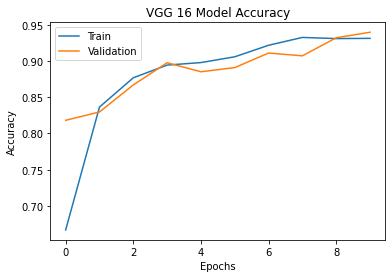

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("VGG 16 Model Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

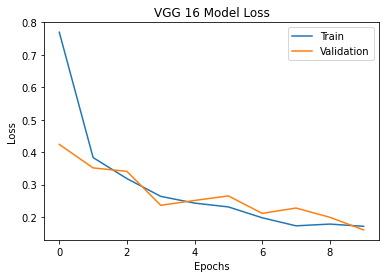

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("VGG 16 Model Loss")
plt.legend(["Train", "Validation"])
plt.show()


In [ ]:
predictions = vgg16_model.predict_generator(val_dataset)
predictions


Instructions for updating:
Please use Model.predict, which supports generators.


array([[1.3426893e-02, 3.6624938e-01, 1.1900130e-02, 6.0842365e-01],
       [9.9928457e-01, 1.4193567e-06, 7.1406277e-04, 1.5831532e-08],
       [8.4082505e-11, 1.0000000e+00, 9.4819604e-12, 5.2281405e-13],
       ...,
       [9.8489088e-01, 1.7571294e-04, 1.4932026e-02, 1.3249298e-06],
       [8.0484745e-07, 9.9999785e-01, 9.5925361e-07, 3.5156521e-07],
       [1.4408945e-09, 1.0000000e+00, 3.5479162e-09, 3.5473460e-10]],
      dtype=float32)

In [ ]:
predicted_class = np.argmax(predictions, axis = 1)
predicted_class

array([3, 0, 1, ..., 0, 1, 1])

In [ ]:

from sklearn.metrics import confusion_matrix

In [ ]:
val_dataset.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
print(confusion_matrix(val_dataset.classes, predicted_class))

[[ 70  84  35  97]
 [ 81 118  53  74]
 [ 47  42  18  36]
 [ 73  95  38  84]]
